# SAR ADC Waveforms

In [10]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import csv
DATADIR = "../data-source"
OUTPUTDIR = "./output"

In [11]:
def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

In [13]:
dscrT                = []
conversionCompletedT = []
samplingT            = []
signalT              = []
dscrS                = []
conversionCompletedS = []
samplingS            = []
signalS              = []

for i in range(29, 36):
    filePrefix = f"{DATADIR}/28-10-21/waveformsAq/F00" + str(i)
    ch2_file = filePrefix + "CH2.CSV"
    ch3_file = filePrefix + "CH3.CSV"
    ch4_file = filePrefix + "CH4.CSV"
    chM_file = filePrefix + "MTH.CSV"
    ch2      = openTek(ch2_file)['Data'].to_numpy().transpose()
    ch3      = openTek(ch3_file)['Data'].to_numpy().transpose()
    ch4      = openTek(ch4_file)['Data'].to_numpy().transpose()
    chM      = openTek(chM_file)['Data'].to_numpy().transpose()
    ch2t     = ch2[0]
    ch3t     = ch3[0]
    ch4t     = ch4[0]
    chMt     = chM[0]
    ch2s     = ch2[1]
    ch3s     = ch3[1]
    ch4s     = ch4[1]
    chMs     = chM[1]
    dscrT.append(ch3t)
    conversionCompletedT.append(ch2t)
    signalT.append(ch4t)
    samplingT.append(chMt)
    dscrS.append(ch3s)
    conversionCompletedS.append(ch2s)
    signalS.append(ch4s)
    samplingS.append(chMs)
    

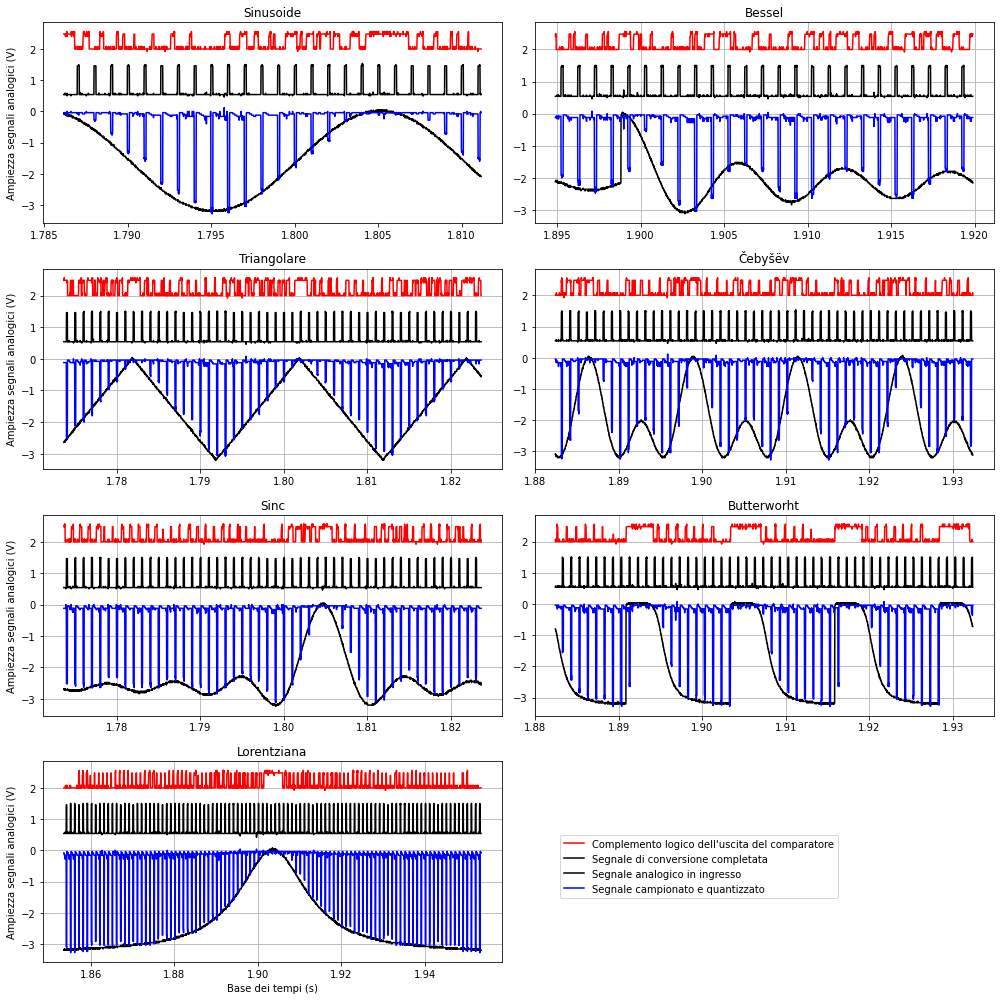

In [17]:
tt = ['Sinusoide', 'Triangolare', 'Sinc', 'Lorentziana', 'Bessel', 'Čebyšëv', 'Butterworht']

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (14,14))
#fig, ax = plt.subplots()

ax[0][0].plot(dscrT[0], dscrS[0] / 10. + 2., color="red", label="Complemento logico dell'uscita del comparatore")
ax[0][0].plot(conversionCompletedT[0], conversionCompletedS[0] + .5, color="black", label="Segnale di conversione completata")
ax[0][0].plot(signalT[0], signalS[0], color = "black", label="Segnale analogico in ingresso")
ax[0][0].plot(samplingT[0], samplingS[0], color = "blue", label="Segnale campionato e quantizzato")
ax[0][0].set(title = "Sinusoide")
    
for i in range(1, len(dscrT)):
    ib = int(int(i)/4) 
    ia = int(int(i)%4)
    ax[ia][ib].plot(dscrT[i], dscrS[i] / 10. + 2., color="red")
    ax[ia][ib].plot(conversionCompletedT[i], conversionCompletedS[i] + .5, color="black")
    ax[ia][ib].plot(signalT[i], signalS[i], color = "black")
    ax[ia][ib].plot(samplingT[i], samplingS[i], color = "blue")
    ax[ia][0].set(ylabel='Ampiezza segnali analogici (V)')
    ax[-1][ib].set(xlabel='Base dei tempi (s)')
    ax[ia][ib].grid()
    ax[ia][ib].set(title = tt[i])
    ax[-1][-1].axis('off')
    
fig.legend(loc = "lower right", bbox_to_anchor=(.84,0.1))
fig.tight_layout()
plt.savefig(f"{OUTPUTDIR}/waveforms.pdf")